# Manipulación de datos

### Cuál es el proposito de la manipualación de datos?

Suusa la manipulación de datos para convertir datos de un formato inicial a otro formato que permita un mejor análisis.

Para este tema usaremos el siguiente conjunto de datos.

* data set = https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. 

En este Notebook se va a ver el siguiente contenido:

* Manejar datos faltantes
* Corregir el formato de datos
* Estadanrizar y normalizar los datos.

Importar las librerías a usar.

In [1]:
import pandas as pd 
import matplotlib.pylab as plt

Lectura del conjunto de datos.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [3]:
df = pd.read_csv(url)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Creamos las cabezeras para las columnas.

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Se puede observar en el dataframe characters ?, estos son valores perdidos obstaculizan  el análisis.

<b>Como debería trabajar a los datos perdidos?</b>

Los pasos que se deberían seguir son:
* Identificar los datos perdidos
* Tratar con los datos faltantes
* Corregir el formato del dato

## 1. Identificar y manejar valores faltantes

### Identificar valores perdidos

#### Convertir "?" a NaN

En el conjunto de datos de automóvilesm se representa datos faltantes con el caracter `?`. Reemplacemos ese caracter por `NaN`(Not a Number). 
El marcador de valor faltante predeterminado de Python por razones de velocidad computacional y conveniencia.Para esto usaa la función:

`.replace(A,B, inplace = True)`, donde se reemplaza A por B.

In [6]:
import numpy as np

df.replace("?",np.NaN, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Evaluación de datos faltantes

Los valores faltantes se convierten de forma predeterminada. Usa las siguientes funciones para identificar estos valores faltantes. Puedes usar dos métodos para detectar datos faltantes:
* `.isnull()`
* `.notnull()`

La salida es un valor booleano que indica si el valor que se pasa al argumento es de hecho un dato faltante.

In [7]:
# isnulll() devolvera True en los valores donde el dato sea NaN
# notnull() devolvera False en los valores donde el dato sea NaN, dado a que este si es NaN

missing_data = df.isnull() 
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


En este caso `True` indica que son valores faltantes, mientras que `False` indica que no son valores faltantes.

### Contar los valores faltantes de cada columna

Mediante un bucle de python, podemos contar la cantidad de valores faltantes para cada columna. 

In [8]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts(""))
    print("") 

symboling
False    204
Name: count, dtype: int64

normalized-losses
False    164
True      40
Name: count, dtype: int64

make
False    204
Name: count, dtype: int64

fuel-type
False    204
Name: count, dtype: int64

aspiration
False    204
Name: count, dtype: int64

num-of-doors
False    202
True       2
Name: count, dtype: int64

body-style
False    204
Name: count, dtype: int64

drive-wheels
False    204
Name: count, dtype: int64

engine-location
False    204
Name: count, dtype: int64

wheel-base
False    204
Name: count, dtype: int64

length
False    204
Name: count, dtype: int64

width
False    204
Name: count, dtype: int64

height
False    204
Name: count, dtype: int64

curb-weight
False    204
Name: count, dtype: int64

engine-type
False    204
Name: count, dtype: int64

num-of-cylinders
False    204
Name: count, dtype: int64

engine-size
False    204
Name: count, dtype: int64

fuel-system
False    204
Name: count, dtype: int64

bore
False    200
True       4
Name: count, dtype: 

Basandonos en el resultado del conteo de cada una de las filas, las siguientes columnas tienen  datos perdidos.

* "normalized-losses": 40 datos perdidos
* "num-of-doors": 2 datos perdidos
* "bore": 4 datos perdidos
* "stroke" : 4 datos perdidos
* "horsepower": 2 datos perdidos
* "peak-rpm": 2 datos perdidos
* "price": 4 datos perdidos

### 2. Tratar con datos faltantes

<b>Como debería tratar a los datos faltantes?</b>

1. Eliminar el dato
   
   a. Eliminar toda la fima
   
   b. Eliminar toda la columna

2. Reemplazar el dato
   
   a. Reemplazarlo por el promedio de todos lo datos
   
   b. Remmplazarlo por la frecuencia de todos los datos
   
   c. Reemplazarlo usando otras funciones

Solo debes eliminar columnas enteras si la mayoría de las entradas en la columna están vacías. 

En el conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo. Tienes cierta libertad para elegir qué método usar para reemplazar los datos; sin embargo, algunos métodos pueden parecer más razonables que otros. Aplica cada método a diferentes columnas:

#### Reemplazar por el promedio

* "normalized-losses": 40 datos perdidos, reemplazarlos por el promedio de los existentes
* "bore": 4 datos perdidos, reemplazarlos por el promedio de los existentes
* "stroke" : 4 datos perdidos, reemplazarlos por el promedio de los existentes
* "horsepower": 2 datos perdidos, reemplazarlos por el promedio de los existentes
* "peak-rpm": 2 datos perdidos, reemplazarlos por el promedio de los existentes

#### Reemplazar por la frecuencia

* "num-of-doors": 2 datos perdidos, reemplazarlos por la frecuencia, en este caso "four".

La razón, debido a que más del 84% de Sedans tienen 4 puertas esto es mas frecuente de que en este caso ocurra.

#### Eliminar la fila entera

* "price": 4 datos perdidos, simplemente elimina la fila.

La razón, quieres predecir el precio. No puedes usar ninguna entrada de datos sin datos de precio para la predicción; por lo tanto, cualquier fila ahora sin datos de precio no es útil para ti.

### Cálculos de promedios de las columnas

#### Calcular el promedio del valor de las columnas "normalized-losses"

In [9]:
# Selecciona la columna, si el dato no es numerico transformarlo, calular el promedio

avg_norma_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_norma_loss

122.0

In [10]:
# Reemplazar el dato calculado 

df["normalized-losses"].replace(np.NaN, avg_norma_loss, inplace=True)

#### Calcular el promedio del valor de las columnas "bore"

In [11]:
avg_bore = df["bore"].astype("float").mean(axis=0)
avg_bore

3.3290499999999996

In [12]:
# Reemplazar el dat calculado

df["bore"].replace(np.NaN, avg_bore, inplace = True)

#### Calcular el promedio del valor de las columnas "stroke"

In [13]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
avg_stroke

3.2582999999999993

In [14]:
# Reemplazar el dato calculado

df['stroke'].replace(np.NaN, avg_stroke, inplace=True)

#### Calcular el promedio del valor de las columnas "horsepower"

In [15]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
avg_horsepower

104.22277227722772

In [16]:
df['horsepower'].replace(np.NaN, avg_horsepower, inplace=True)

#### Calcular el promedio del valor de las columnas "peak-rpm"

In [17]:
avg_peak = df['peak-rpm'].astype('float').mean(axis=0)
avg_peak

5125.990099009901

In [18]:
df['peak-rpm'].replace(np.NaN, avg_peak, inplace=True)

### Cálculo de la frecuencia de una columna

Para mirar los valores que se encuentran en una columna en particular, podemos usar el método `.value_counts()`.

In [19]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

Podemos observar que "four" es el dato mas común. También es posible uar el método `.idxmax()` para aclular el tipo de dato más común de manera automática.

In [20]:
df['num-of-doors'].value_counts().idxmax()

'four'

Reemplazar este dato es muy similar a lo visto anteriormente.

In [21]:
df['num-of-doors'].replace(np.NaN, "four", inplace = True)

### Eliminación de filas sin datos

Finalmente, eliminar las filas que no contiene el dato del precio "price".

In [22]:
# Elimina las filas con el dato NaN del data set

df.dropna(subset=["price"], axis=0, inplace=True)

# Formatea el index, debido a que se eliminaron filas

df.reset_index(drop=True, inplace=True)

Ahora veamos el resultado de la manipulación de los datos.

In [23]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


## 2. Verificar el formato de los datos

Lo último que queda es verificar y asegurar que los datos se encuntran con los formatos correctos para cada columna (int, float, object).

En Pandas se usa:

* `.astype()`- Para cambiar un formato a otro.
* `.dtype()` -Para mostrar los formatos de data frame.

Veamos el tipo de datos de cada columna.

In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Con esta información podemos observar que algunas columnas no se encuentran con el formato correcto, variables numéricas que deberian tener un formato `int` o `float` se encuentran como cadenas que en pandas se representa con el tipo `object`.

#### Convertir los datos a los formatos apropiados

In [25]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Volvamos a verificar.

In [26]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Bien, ahora que se ha realizado la limpieza de los datos no se tendrá valores perdidos, de la misma manera estos se encuentran en sus formatos correctos.

## 3 .Estandarización y normalización de datos

### Estandarización de datos


<b>¿Qué es la estandarización?</b>

La estandarización es el proceso de transformar datos en un formato común, lo que permite al investigador realizar comparaciones significativas.

#### Ejemplo

Transformar mpg a L/100Km.

En el conjunto de datos, las columnas de consumo de combustible "city-mpg" y "highway-mpg" están representadas por la unidad mpg (millas por galón). Supongamos que estás desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar de L/100 km.

En este caso es necesario aplicar la transformación de datos de mpg a L/100Km.

Usando la fórmula de conversion de unidades:

L/100Km = 235/mpg

Podemos aplicar las operaciones matemáticas necesarias directamente usando Pandas.

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


In [28]:
# Convertimos mpg a L/100km mediante la operacion (235 dividido entre mpg)

df['city-L/100km'] = 235/df["city-mpg"]

# Verifiquemos los datos, aqui se creo una nueva columna al final.

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


De la misma forma realicemos el cálculo para la columna "highway-mpg".

In [29]:
# transforma mpg a L/100km mediante la operacion (235 deividido entre mpg), el calculo esta vez se hace sobre la misma columna
df["highway-mpg"] = 235/df["highway-mpg"]

# renombra las columnas de "highway-mpg" a "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# verifica el data frame
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421


### Normalización de datos

<b>¿Qué es la normalización?</b>

La normalización es el proceso de transformar los valores de varias variables en un rango similar. Las normalizaciones típicas incluyen:

* escalar la variable para que el promedio de la variable sea 0
* escalar la variable para que la varianza sea 1
* escalar la variable para que los valores de la variable estén en un rango de 0 a 1

#### Ejemplo

Para demostrar la normalización, digamos que deseas escalar las columnas "length", "width" y "height".

* Objetivo: normalizar esas variables para que sus valores oscilen entre 0 y 1

* Enfoque: reemplazar el valor original por (valor original) / (valor máximo)

In [30]:
# reemplazar (valores originales) por (valores orginales)/(valor maximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [31]:
df['height'] = df['height']/df['height'].max()

Veamos las columnas escaladas.

In [32]:
df[['height','width','length']].head()

,height,width,length
0,0.816054,0.890278,0.811148
1,0.876254,0.909722,0.822681
2,0.908027,0.919444,0.848630
3,0.908027,0.922222,0.848630
4,0.887960,0.920833,0.851994


### Agrupamiento (Binning)

El agrupamiento es un proceso de transformar variables numéricas continuas en discretas categorías "bins" para análisis agrupados.

#### Ejemplo

En el conjunto de datos, "horsepower" es una variable de valor real que varía de 48 a 288 y tiene 59 valores únicos. ¿Qué pasa si solo te importa la diferencia de precio entre los autos con alta potencia, potencia media y poca potencia (3 tipos)? Puedes reorganizarlos en tres 'bins' para simplificar el análisis.

Usando el método de Pandas `cut` para segementar la columna `horsepower` en 3 bins.

Convertimos el datos en su fomato correcto. Dado que en la limpieza anterior este datos se nos paso, lo cambiamos de tipo `object` a `int`.

In [33]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)

In [34]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421


In [35]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
dtype: object

Gráficamos el histograma de la columna horsepower para ver su distribución.

Text(0.5, 1.0, 'horsepower bins')

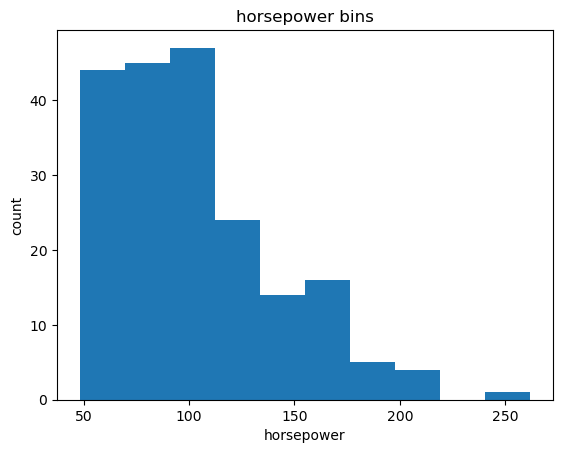

In [36]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Buscamos 3 bins de igual longitud, esto lo podemos hacer usando Numpy, mediante la función `np.linspace(init_value, end_value, numbers_generate)`.

En este caso:
* intit_value = `min(df['horsepower'])`
* end_value = `max(df["horsepower"])`
* numbers_generate = 4, dado que buscamos 3 bins de igual longitud necesitamos 4 divisores.

Construimos el array con la información planteada

In [37]:
import numpy as np

bins = np.linspace(min(df['horsepower']),max(df["horsepower"]),4)
print(bins)

[ 48.         119.33333333 190.66666667 262.        ]


Conjunto de nombres.

In [38]:
group_names = ['Low','Medium','High']

Aplicamos la función `cut` para determinar a qué categoría pertenece cada valor de `df['horsepower']`.

In [39]:
# Agrupa valores de la columna horsepower en intervalos especificos bins, y se les asigna sus respectivas etiquetas
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421,Low


Ahora veamos el número de vehiculos de cada bin.

In [41]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       152
Medium     43
High        5
Name: count, dtype: int64

ESto indica que se agurupo 152 vehiculos que se consideraron de bajo caballo de fuerza, 43 de medio y 5 de alto caballo de fuerza.

Grafiquemos la distribución.

Text(0.5, 1.0, 'horsepower bins')

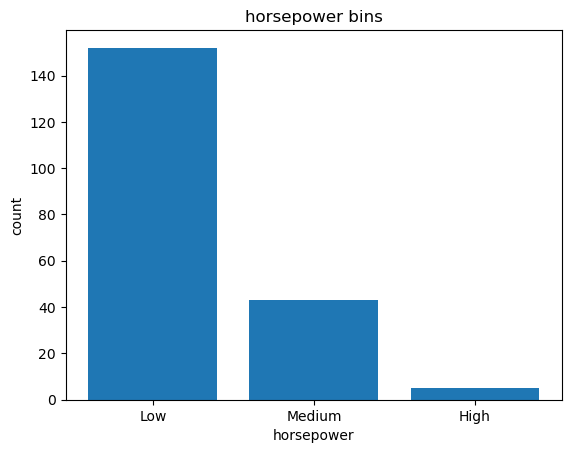

In [42]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Observa cuidadosamente el marco de datos anterior. Encontrarás que la última columna proporciona los "bins" para "horsepower" basados en 3 categorías ("Baja", "Media" y "Alta").

Hemos conseguido reducir un intervalo de 59 valores unicos a 3.

### Visualización de bins

Normalmente puedes usar histogramas para visualizar la distribucion de bins, tal como lo hicimos anteriormente.

Text(0.5, 1.0, 'horsepower bins')

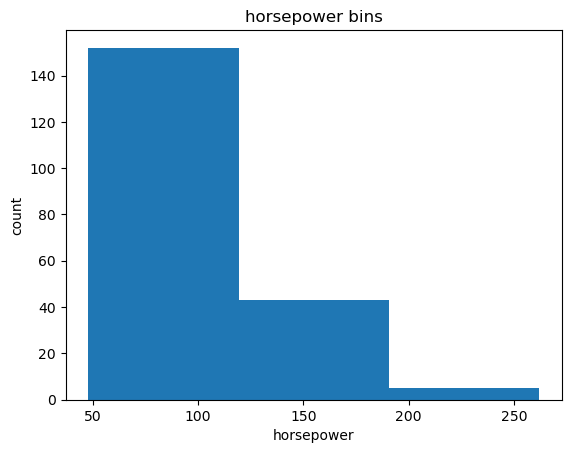

In [43]:

# deibuja un histograma de la distribucion "horsepower" con bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

La gráfica muestra el resultado para el atributo horsepower.

### Variable indicador

<b>Qué es una variable indicador</b>

Una variable indicadora (o variable dummy) es una variable numérica utilizada para etiquetar categorías. Se llaman 'dummies' porque los números en sí mismos no tienen un significado inherente.

<b>Porqué usar una variable indicadora?</b>

Utilizas variables indicadoras para poder usar variables categóricas en análisis de regresión en los módulos posteriores.

#### Ejemplo

La columna "fuel-type" tiene dos valores únicos: "gas" o "diesel". La regresión no entiende palabras, solo números. Para usar este atributo en análisis de regresión, puedes convertir "fuel-type" en variables indicadoras.

Utiliza el método de Pandas `get_dummies` para asignar valores numéricos a las diferentes categorías del tipo de combustible.

In [44]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Establecer una variable indicadora y asignarla a un dataframe.

In [45]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"]).astype(int)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Cambiar el nombre de las columnas a algo más claro.

In [46]:
dummy_variable_1.rename(columns={'diesel':'fuel-type-diesel','gas':'fuel-type-gas'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


En el datafram, la columna fuel-type  ahora se evalua para 'gas' y 'diesel' como 0 y 1.

In [47]:
# une los dataframe "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# Elimina la columna original "fuel-type" de "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [48]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,9.400000,15250.0,12.368421,Low,0,1


De la misma manera realizamos y creamos una variable indicadora para la columna aspiration.

In [50]:
# Creamos la variable indicadora
dummy_variable_2 = pd.get_dummies(df['aspiration']).astype(int)
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Renombre de columnas.

In [51]:
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Agregamos al dataframe "df".

In [52]:
# une los dataframe "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# Elimina la columna original "aspiration" de "df"
df.drop("aspiration", axis = 1, inplace=True)

In [53]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,9.400000,15250.0,12.368421,Low,0,1,1,0


Ahora que hemos finalizado, podemos guardar el conjunto de datos limpio.

In [ ]:
pd.to_csv('data-clean-df.csv')

<hr/>

## Autor:
Jonathan Palan

## Carga y cambios

| Fecha             |Por         |  Descripción                                  |
| -----------------| ---------------| ----------------------------------------------|
| 2024-05-5     | Jonathan Palan | Traducción curso Data Analysis with Python|

## Bibliografía

[1] IBM,"Data Analysis with Python", Skills Network 
<hr/>